# Day 10

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family="NanumBarunGothic", size=20)
%matplotlib inline

# matplotlib의 여러가지 플롯

matplotlib는 기본적인 라인 플롯 이외에도 다양한 챠트/플롯 유형을 지원한다.

## 바 차트

x, y 데이터 중 하나가 카테고리 값인 경우에는 `bar` 명령과 `barh` 명령으로 바 차트(bar chart) 시각화를 할 수 있다. 가로 방향으로 바 차트를 그리려면 `barh` 명령을 사용한다.

자세한 내용은 다음 웹사이트를 참조한다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh

바 차트 작성시 주의점은 첫번째 인수인 `left` 가 x축에서 바(bar)의 왼쪽 변의 위치를 나타낸다는 점이다. 바의 위치를 xtick 위치의 중앙으로 옮기려면 `align='center'` 인수를 지정해야 한다.

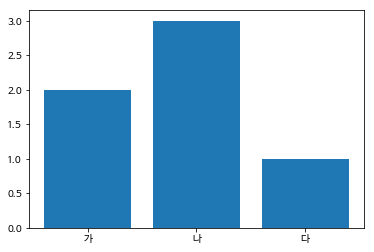

In [96]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = [u'가', u'나', u'다']
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.show()

`xerr` 인수나 `yerr` 인수를 지정하면 에러 바(error bar)를 추가할 수 있다.

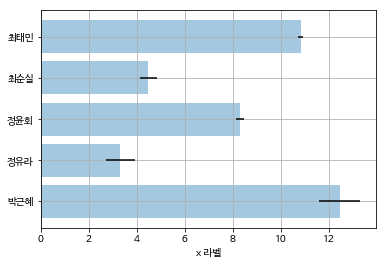

In [85]:
people = (u'박근혜', u'정유라', u'정윤회', u'최순실', u'최태민')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
plt.figure(),
plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel(u'x 라벨')
plt.grid()
plt.show()

두 개 이상의 바 차트를 한번에 그리는 경우도 있다.

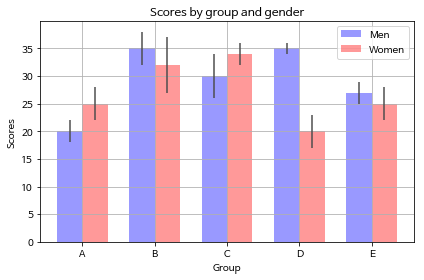

In [92]:
n_groups = 5
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)
means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 align='edge',
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 align='edge',
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

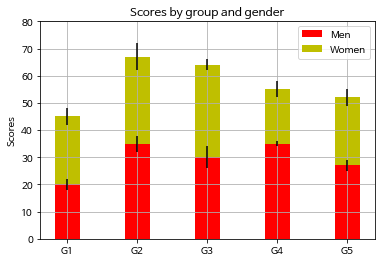

In [100]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.grid(True)
plt.show()

## 스템 플롯

바 차트와 유사하지만 폭(width)이 없는 스템 플롯(stem plot)도 있다. 주로 이산 확률 함수나 자기상관관계(auto-correlation)를 묘사할 때 사용된다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.stemv

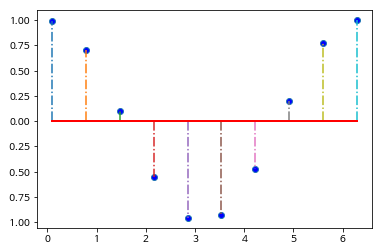

In [104]:
x = np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.show()

## 파이 차트

카테고리 별 값의 상대적인 비교를 해야 할 때는 `pie` 명령으로 파이 차트(pie chart)를 그릴 수 있다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie

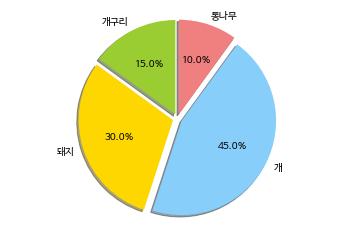

In [113]:
labels = u'개구리', u'돼지', u'개', u'통나무'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 히스토그램

히스토그램을 그리기 위한 `hist` 명령도 제공한다. `hist` 명령은 `bins` 인수로 데이터 집계 구간을 받는다. 또한 반환값으로 데이터 집계 결과를 반환해주므로 이 결과를 다른 코드에서 사용할 수도 있다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

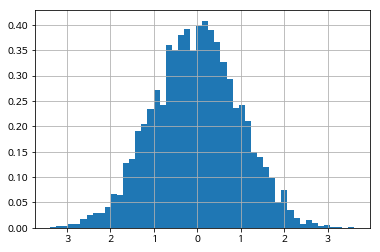

In [118]:
x = np.random.randn(5000)
plt.grid(True)
arrays, bins, patches = plt.hist(x, bins=50, normed=True)
plt.show()

## 스캐터 플롯

두 개의 데이터 집합, 예를 들면 두 벡터의 상관관계를 살펴보려면 `scatter` 명령으로 스캐터 플롯을 그린다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

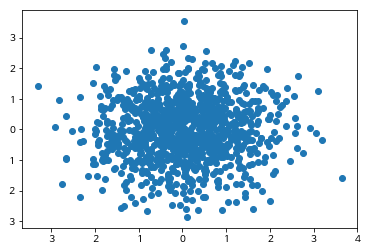

In [119]:
X = np.random.normal(0,1,1024)
Y = np.random.normal(0,1,1024)
plt.scatter(X,Y)
plt.show()

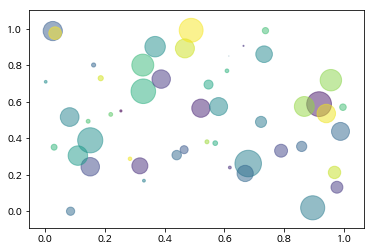

In [120]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Imshow

지금 까지는 1개 혹은 2개의 1차원 자료에 대한 시각화를 살펴보았다. 이제는 행과 열을 가진 2차원 데이터의 시각화에 대해 알아본다. 
예를 들어 화상(image) 데이터는 전형적인 2차원 자료이다. 

가장 간단한 2차원 자료 시각화 방법은 `imshow` 명령을 써서 2차원 자료 자체를 각 위치의 명암으로 표시하는 것이다. 자료의 시각화를 돕기위해 다양한 2차원 인터폴레이션을 지원한다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow


In [121]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

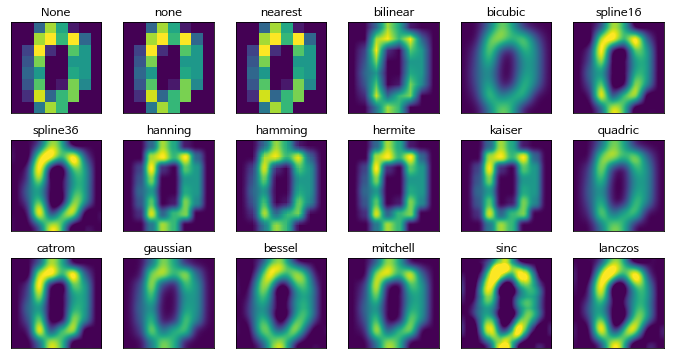

In [122]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
fig, axes = plt.subplots(3, 6, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(X, interpolation=interp_method)
    ax.set_title(interp_method)
plt.show()

## 컨투어 플롯

2차원 자료를 시각화하는 또다른 방법은 명암이 아닌 등고선(contour)을 사용하는 방법이다. `contour` 혹은 `contourf` 명령을 사용한다.

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf

In [146]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

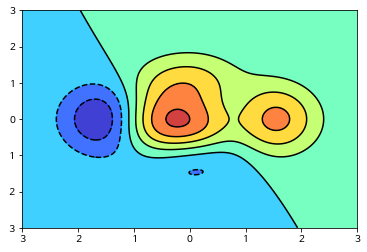

In [148]:
plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet')
plt.contour(XX, YY, ZZ, colors='black', linewidth=.5)
plt.show()

## 3D 서피스 플롯

입력 변수가 x, y 두 개이고 출력 변수가 z 하나인 경우에는 3차원 자료가 된다. 3차원 플롯은 일반 플롯과 달리 `Axes3D`라는 3차원 전용 axes를 생성해야 한다. 

`plot_wireframe`, `plot_surface` 명령을 사용한다.

* http://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe
* http://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface

In [169]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

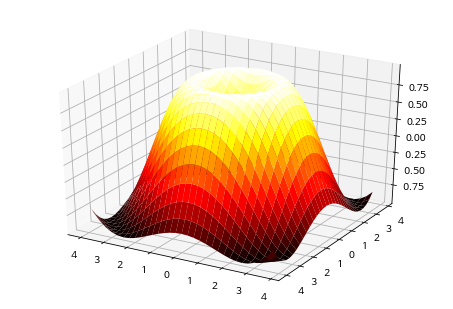

In [170]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:157: RuntimeWarning: invalid value encountered in remainder
  theta %= 2 * np.pi


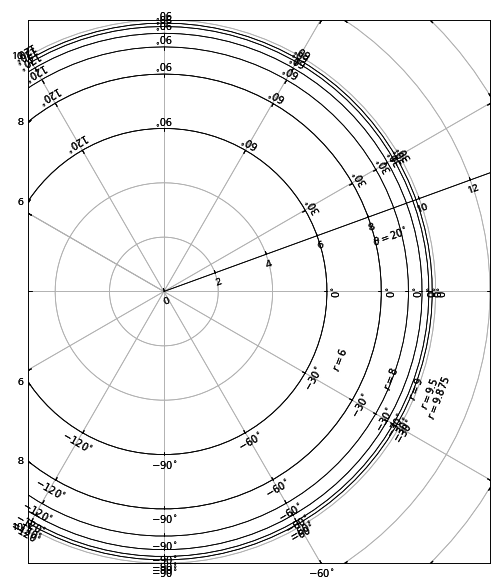

In [190]:
"""
Axis within rectangular frame

The following code demonstrates how to put a floating polar curve within a
rectangular box. In order to get a better sense of polar curves, please look at
demo_curvelinear_grid.py.
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import SubplotHost
from mpl_toolkits.axisartist import GridHelperCurveLinear


def curvelinear_test2(fig):
    """
    polar projection, but in a rectangular box.
    """
    global ax1
    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi / 180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(10,
                                                     10,
                                                     lon_cycle=360,
                                                     lat_cycle=360,
                                                     lon_minmax=None,
                                                     lat_minmax=(0,
                                                                 np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

    fig.add_subplot(ax1)

    # Now creates floating axis

    # floating axis whose first coordinate (theta) is fixed at 60
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 20)
    axis.label.set_text(r"$\theta = 20^{\circ}$")
    axis.label.set_visible(True)

    # floating axis whose second coordinate (r) is fixed at 6
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")
    
    # floating axis whose second coordinate (r) is fixed at 8
    ax1.axis["lon2"] = axis = ax1.new_floating_axis(1, 8)
    axis.label.set_text(r"$r = 8$")
    
    # floating axis whose second coordinate (r) is fixed at 9
    ax1.axis["lon3"] = axis = ax1.new_floating_axis(1, 9)
    axis.label.set_text(r"$r = 9$")
    
    # floating axis whose second coordinate (r) is fixed at 9.5
    ax1.axis["lon4"] = axis = ax1.new_floating_axis(1, 9.5)
    axis.label.set_text(r"$r = 9.5$")

    # floating axis whose second coordinate (r) is fixed at 9.75
    ax1.axis["lon5"] = axis = ax1.new_floating_axis(1, 9.75)

    # floating axis whose second coordinate (r) is fixed at 9.875
    ax1.axis["lon6"] = axis = ax1.new_floating_axis(1, 9.875)
    axis.label.set_text(r"$r = 9.875$")

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-10, 10)
    ax1.grid(True)
    
    
fig = plt.figure(1, figsize=(10, 10))
fig.clf()

curvelinear_test2(fig)

plt.show()

# Seaborn을 사용한 데이터 분포 시각화

Seaborn은 matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지이다. 당연히 matplotlib 패키지에 의존하며 통계 기능의 경우에는 statsmodels 패키지에 의존한다.

Seaborn에서 제공하는 플롯의 종류는 다음과 같다.

* 분포 플롯 (distribution plot)
* 회귀 분석 플롯 (regression plot)
* 카테고리 플롯 (categorical plot)
* 행렬 플롯 (matrix plot)
* 시계열 플롯 (time series plot)

Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

* http://stanford.edu/~mwaskom/software/seaborn/index.html

## 스타일

seaborn을 임포트하게 되면 바탕화면, axis, 색상 팔레트 등을 matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 디폴트 스타일 집합으로 변경한다. 따라서 동일한 matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다르다. 

`set` 명령으로 스타일을, `set_color_codes` 명령으로는 기본 색상을 변경한다.

In [191]:
import seaborn as sns
sns.set()
sns.set_color_codes()

## 1차원 분포 플롯

1차원 데이터은 실수 값이면 히스토그램 등의 실수 분포 플롯, 카테고리 값이면 카운트 플롯으로 나타낸다.

우선 연습을 위한 샘플 데이터를 로드한다.

In [192]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

### 실수 분포 플롯

실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공한다. 실수 분포 플롯 명령에는 다음과 같은 것들이 있다.

* `rugplot`
* `kdeplot`
* `distplot`
* `jointplot`
* `pairplot`

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분으로 나타내어 실제 데이터 분포를 보여준다.

In [193]:
np.random.seed(0)
x = np.random.randn(100)

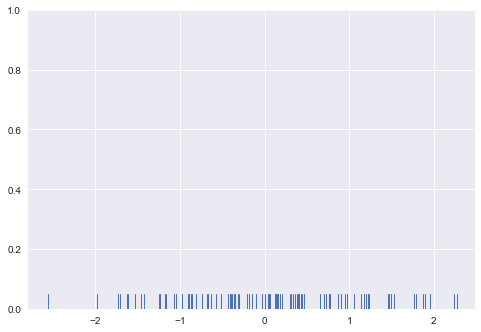

In [196]:
sns.rugplot(x)
plt.show()

커널 밀도(kernel density)는 커널이라고 하는 단위 플롯을 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다. 커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.

* http://scikit-learn.org/stable/modules/density.html

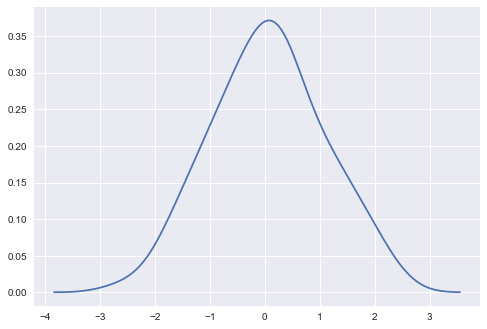

In [200]:
sns.kdeplot(x)
plt.show()

seaborn의 `distplot` 명령은 matplotlib의 히스토그램 명령을 대체하여 많이 쓰인다. 러그와 커널 밀도 기능을 가지고 있다.

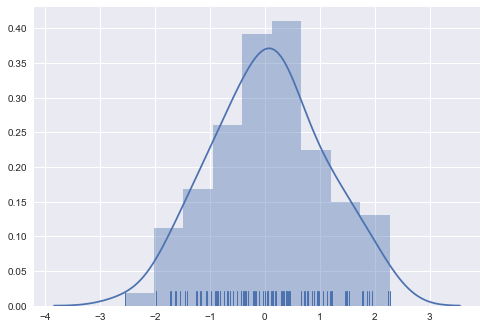

In [201]:
sns.distplot(x, kde=True, rug=True)
plt.show()

**데이터가 많은 경우 rug는 생략하도록 하자**

### 카운트 플롯

`countplot` 명령으로 각 카테고리별 데이터 값을 셀 수 있다.

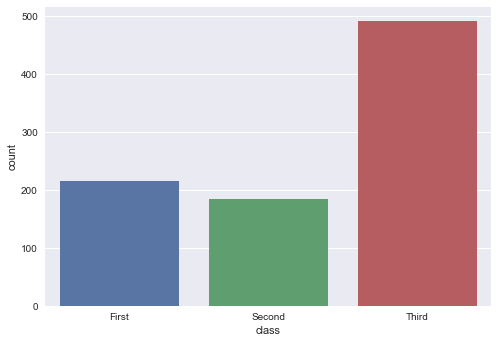

In [202]:
sns.countplot(x="class", data=titanic)
plt.show()

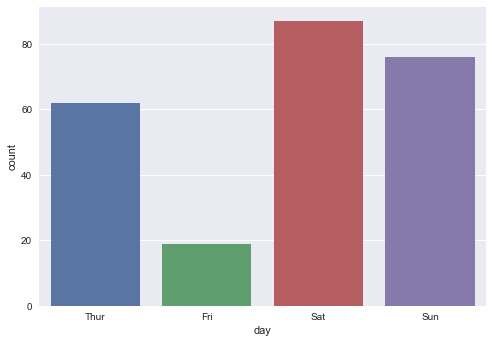

In [203]:
sns.countplot(x="day", data=tips)
plt.show()

## 다차원 데이터

데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

* 분석하고자 하는 데이터가 모두 실수 값인 경우
* 분석하고자 하는 데이터가 모두 카테고리 값인 경우
* 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우


### 2차원 실수형 데이터

만약 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다. 스캐터 플롯을 그리기 위해서는 seaborn 패키지의 `jointplot` 명령을 사용한다. `jointplot` 명령은 스캐터 플롯뿐 아니라 각 변수의 히스토그램도 동시에 그린다.

* [http://seaborn.pydata.org/generated/seaborn.jointplot.html](http://seaborn.pydata.org/generated/seaborn.jointplot.html)

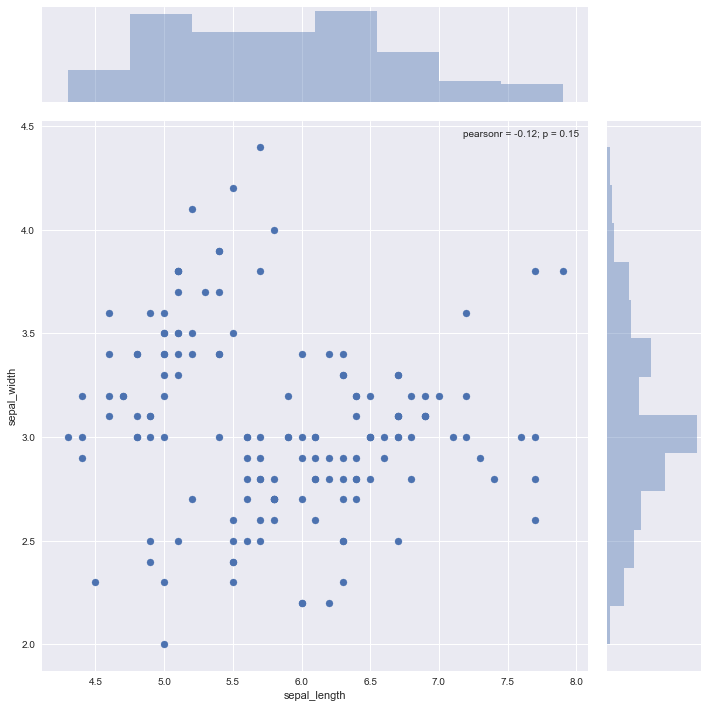

In [208]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=10)
plt.show()

또한 인수를 바꾸면 커널 밀도의 형태로도 표시할 수 있다.

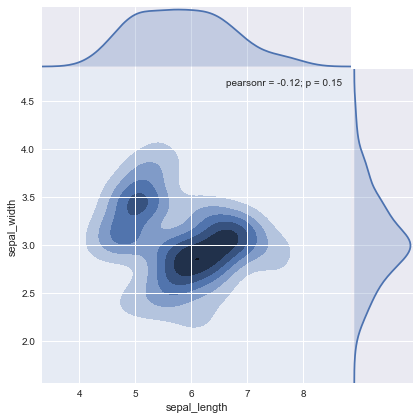

In [209]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde", space=0, zorder=0, n_levels=6)
plt.show()

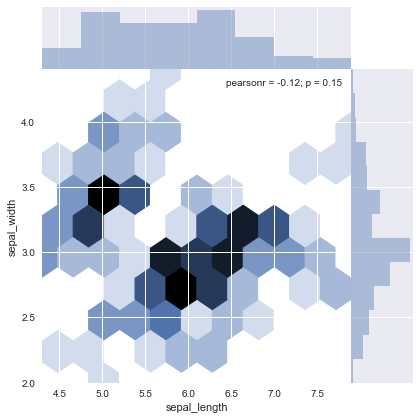

In [214]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex", space=0, zorder=0)
plt.show()

### 다차원 실수형 데이터

만약 3차원 이상의 데이터라면 seaborn 패키지의 `pairplot` 명령을 사용한다. `pairplot`은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 스캐터 플롯을 그린다.

* [http://seaborn.pydata.org/generated/seaborn.pairplot.html](http://seaborn.pydata.org/generated/seaborn.pairplot.html)

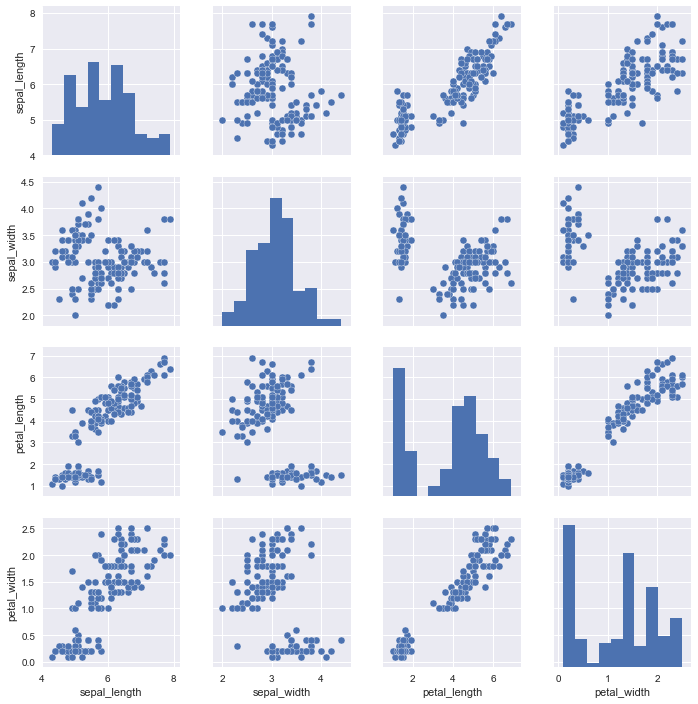

In [210]:
sns.pairplot(iris)
plt.show()

만약 카테고리형 데이터가 섞여 있다면 `hue` 인수를 이용하여 카테고리 별로 색상을 다르게 할 수 있다.

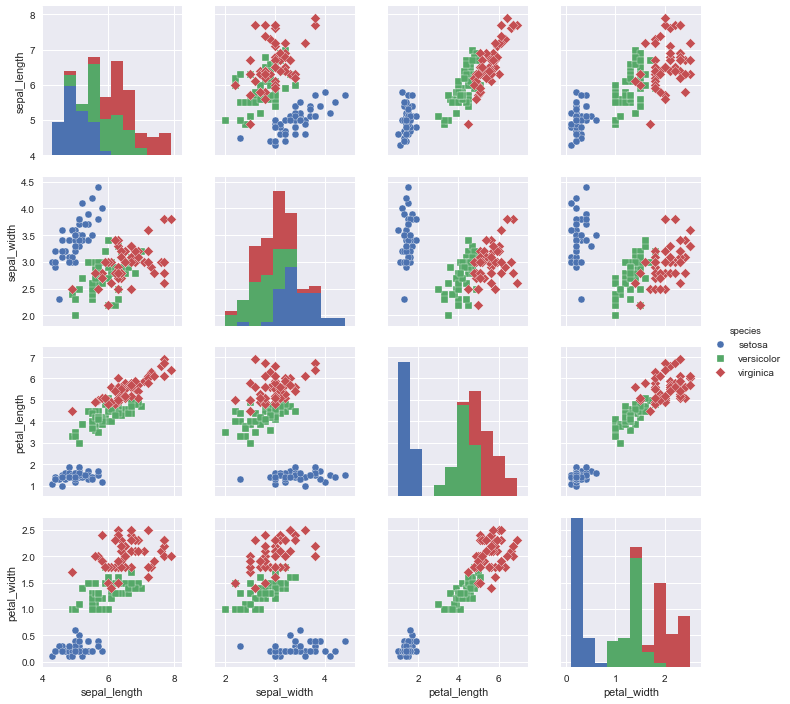

In [211]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()

### 2차원 카테고리 데이터

만약 데이터가 2차원이고 모든 값이 카테고리  값이면  `heatmap` 명령을 사용한다.

* [http://seaborn.pydata.org/generated/seaborn.heatmap.html](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [216]:
titanic_size = titanic.pivot_table(index="class", columns="embark_town", aggfunc="size")
titanic_size

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


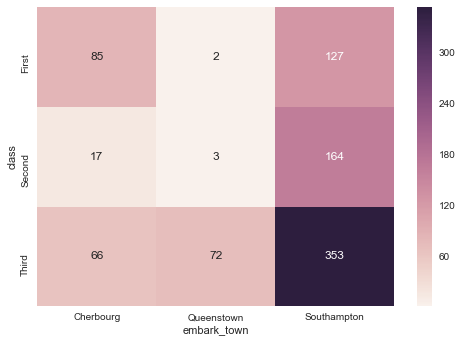

In [217]:
sns.heatmap(titanic_size, annot=True, fmt="d")
plt.show()

### 다차원 복합 데이터

만약 데이터가 다차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.


* `barplot`
* `boxplot`
* `pointplot`
* `violinplot`
* `stripplot`
* `swarmplot`
* `factorplot`


`barplot` 은 카테고리 값에 따른 실수 값의 평균과 표준 편차를 표시하는 기본적인 바 차트를 생성한다.

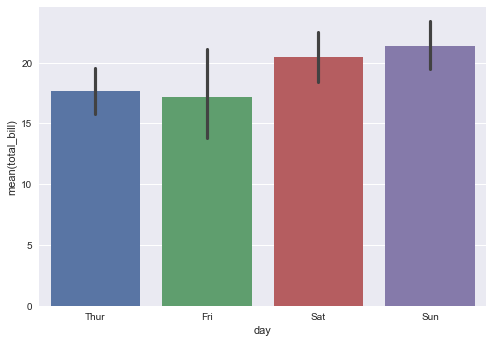

In [218]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

두 가지 카테고리 값에 의한 변화를 보려면 `hue` 인수를 이용한다.

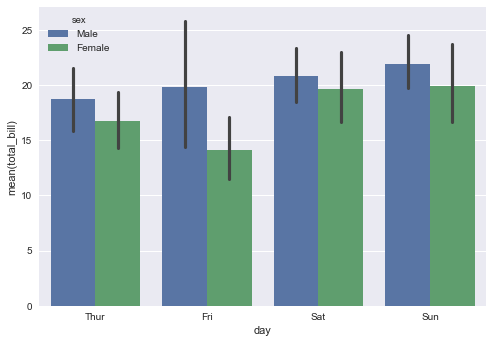

In [219]:
tips = sns.load_dataset("tips")
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

`heatmap`을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.

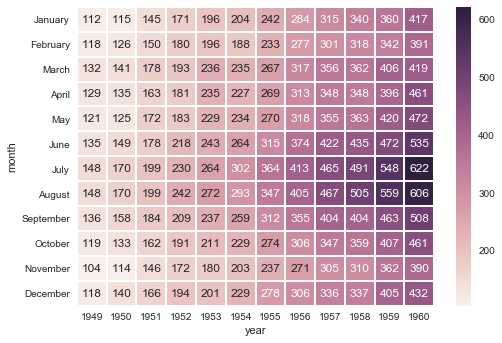

In [220]:
flights_passengers = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

`boxplot`과 `pointplot`은 카테고리 값에 따라 실수 값 분포의 특성(중앙값, 표준 편차, 아웃라이어 등)이 어떻게 바뀌는지를 보여준다.

마찬가지로 `hue` 인수를 이용하면 두 개의 카테고리 값의 영향을 볼 수 있다.

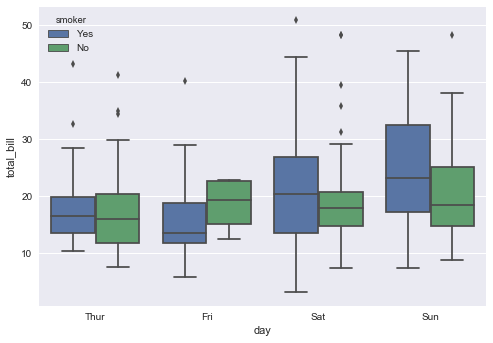

In [221]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)
plt.show()

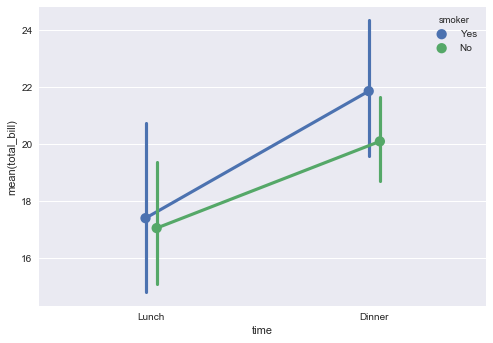

In [224]:
sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, dodge=True)
plt.show()

`boxplot`과 `pointplot`이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 `violinplot`, `stripplot`. `swarmplot` 등은 카테고리값에 따른 각 분포의 전체 형상을 보여준다는 장점이 있다. `stripplot` 과 `swarmplot` 은 보통 `boxplot`이나 `violinplot`과 같이 사용된다.

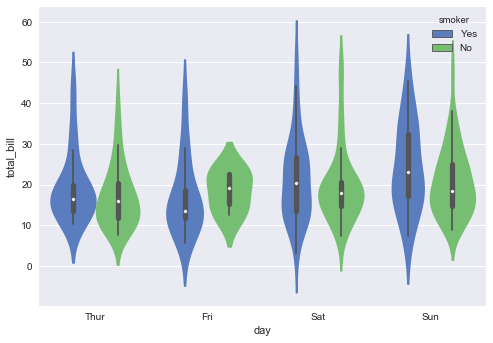

In [225]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")
plt.show()

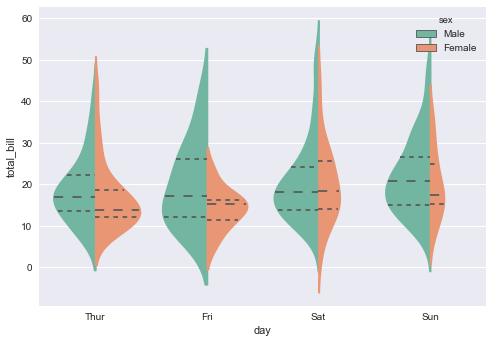

In [226]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

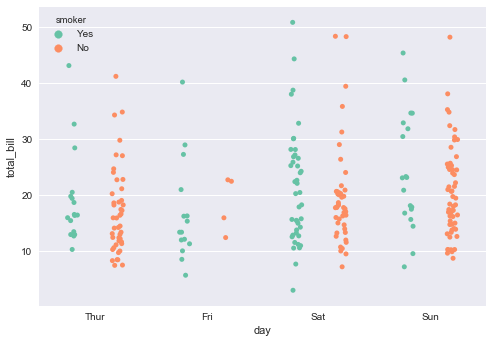

In [227]:
sns.stripplot(x="day", y="total_bill", hue="smoker", data=tips, jitter=True, palette="Set2", split=True)
plt.show()

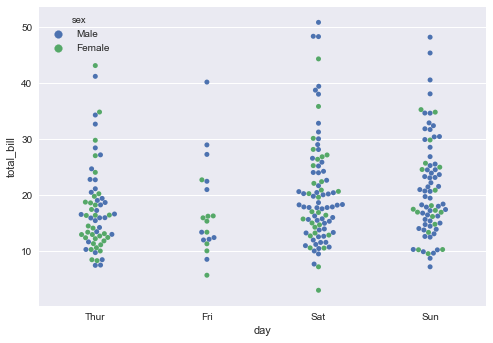

In [228]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

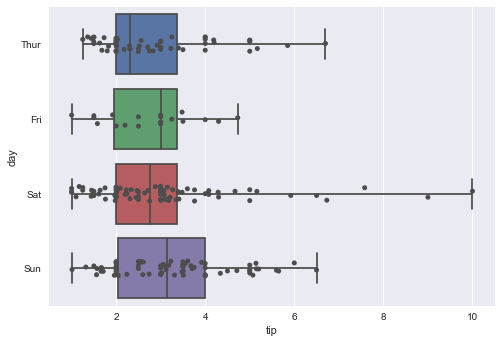

In [229]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color=".3")
plt.show()

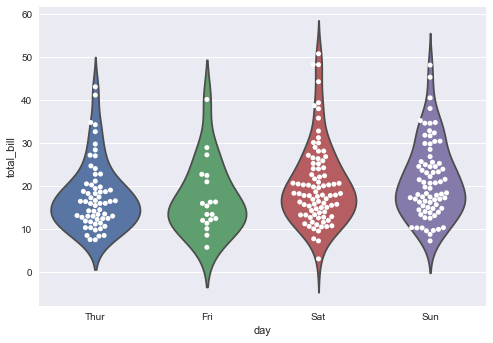

In [230]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="white", edgecolor="gray")
plt.show()

`factorplot`은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.

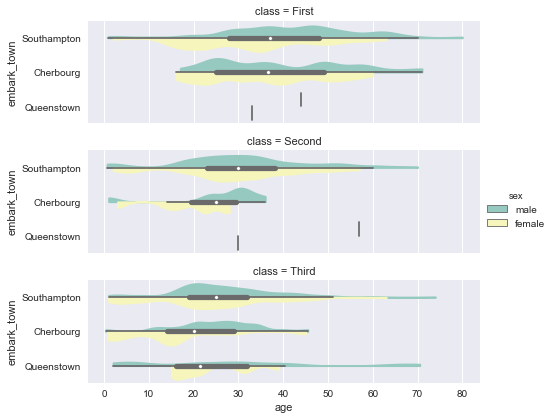

In [231]:
sns.factorplot(x="age", y="embark_town", hue="sex", row="class", data=titanic[titanic.embark_town.notnull()],
               orient="h", size=2, aspect=3.5, palette="Set3", kind="violin", split=True, cut=0, bw=.2)
plt.show()